In [9]:
import pandas as pd
import numpy as np
%matplotlib inline

data = pd.read_csv("~/Downloads/MyEBirdData.csv")

df = pd.DataFrame(data, columns = ['Submission ID', 'Common Name', 'Count',
                                   'State/Province', 'County', 'Location', 'Date', 'Time', 'Duration (Min)'])
df['County'].fillna('n/a', inplace=True)
df['Count'].replace('X', '1',inplace=True)
df['Count'] = df['Count'].astype(int)

lp = df.loc[df['Location'] == 'Olmsted Park--Leverett Pond']

# Total species records.
print(len(lp))
lp['Submission ID'].count()


1642


1642

In [2]:

checklists = lp.groupby(['Submission ID']).size().sort_values(ascending=False)

# Total checklists
print(len(checklists))
checklists.count()

86


86

In [3]:
# Species and occurrence on checklists
lp['Common Name'].value_counts()


Canada Goose                                     84
Mallard                                          78
House Sparrow                                    73
American Robin                                   67
Common Grackle                                   62
Common Starling                                  61
Mourning Dove                                    60
Red-winged Blackbird                             59
Blue Jay                                         53
Downy Woodpecker                                 50
White-breasted Nuthatch                          44
Black-capped Chickadee                           43
Wood Duck                                        41
Warbling Vireo                                   39
Double-crested Cormorant                         38
Northern Cardinal                                38
Song Sparrow                                     37
Red-tailed Hawk                                  32
Great Blue Heron                                 31
Tufted Titmo

In [4]:
# Species recorded per checklist
lp['Submission ID'].value_counts()


S29564332    41
S29732843    40
S29585996    36
S29636132    33
S29416521    32
S30009015    30
S23488570    30
S29361982    29
S30667956    28
S29306272    28
S23324394    28
S29798442    27
S29514830    26
S29706028    26
S29236802    26
S30855359    25
S23187894    25
S29463729    24
S14091633    23
S18380075    23
S29449002    23
S29039999    23
S14092767    22
S11877075    22
S29137082    22
S20578567    22
S23659681    22
S28449875    22
S17253059    22
S23653085    21
             ..
S20378879    16
S29011776    16
S28241853    15
S14564075    15
S20235877    15
S28566530    15
S25494378    13
S19543730    13
S27787962    13
S16435446    13
S15328266    13
S31544093    13
S26982056    12
S27110248    12
S26381568    12
S14564059    11
S17587209    11
S13389698    11
S16751079    11
S29211056    11
S15178050    11
S21639314    10
S10967233    10
S15123472     9
S24864209     9
S18947400     9
S15087764     8
S16466751     7
S22680942     5
S14165144     3
Name: Submission ID, Len

In [5]:

species = lp.groupby(['Common Name']).size()#.to_frame('Size')

# Total species
print(len(species))
species.count()

105


105

In [35]:

x = lp.groupby(['Common Name']).size().to_frame('Freq.')

x['Abun.'] = lp.groupby('Common Name')['Count'].sum()#.to_frame('Abun.')

x['Occu.'] = x['Freq.'] / len(checklists)
x = x.round({'Occu.': 3})

x.sort_values(by=['Occu.'], ascending=False)

print(x.sort_values(by=['Occu.'], ascending=False).head(20))


                          Freq.  Abun.  Occu.
Common Name                                  
Canada Goose                 84    572  0.977
Mallard                      78    487  0.907
House Sparrow                73    363  0.849
American Robin               67    257  0.779
Common Grackle               62    391  0.721
Common Starling              61    194  0.709
Mourning Dove                60    145  0.698
Red-winged Blackbird         59    167  0.686
Blue Jay                     53     84  0.616
Downy Woodpecker             50     88  0.581
White-breasted Nuthatch      44     63  0.512
Black-capped Chickadee       43     75  0.500
Wood Duck                    41    264  0.477
Warbling Vireo               39     85  0.453
Northern Cardinal            38     62  0.442
Double-crested Cormorant     38     64  0.442
Song Sparrow                 37     43  0.430
Red-tailed Hawk              32     46  0.372
Tufted Titmouse              31     78  0.360
Great Blue Heron             31   

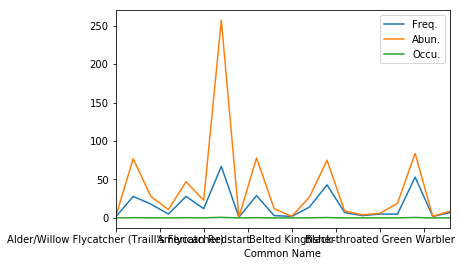

In [95]:
%matplotlib inline
#x.plot()
x.head(20).plot()

                                               Count
Common Name                                         
Alder/Willow Flycatcher (Traill's Flycatcher)      1
American Black Duck                               77
American Coot (Red-shielded)                      28
American Crow                                     11
American Goldfinch                                47
American Redstart                                 23
American Robin                                   257
Bald Eagle                                         1
Baltimore Oriole                                  78
Barn Swallow                                      12
Belted Kingfisher                                  2
Black-and-white Warbler                           27
Black-capped Chickadee                            75
Black-crowned Night-Heron                          9
Black-throated Blue Warbler                        4
Black-throated Green Warbler                       6
Blackpoll Warbler                             

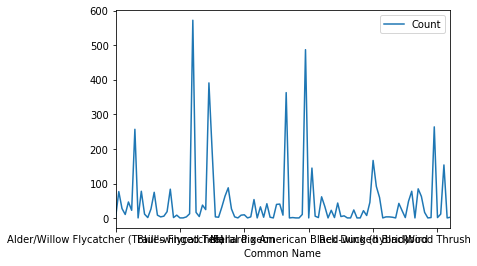

In [92]:
%matplotlib inline

xc = pd.DataFrame(lp, columns = ['Common Name', 'Count'])

xc = xc.groupby('Common Name').sum()

xc.plot()
print(xc)